In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

/home/rupamay/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
df_raw1= pd.read_csv("IoTpond1.csv", delimiter = ",",low_memory=False)

In [3]:
df_raw1.head(5)

,created_at,entry_id,Temperature (C),Turbidity(NTU),Dissolved Oxygen(g/ml),PH,Ammonia(g/ml),Nitrate(g/ml),Population,Fish_Length(cm),Fish_Weight(g)
0,2021-06-19 00:00:05 CET,1889,24.8750,100,4.505,8.43365,0.45842,193,50,7.11,2.91
1,2021-06-19 00:01:02 CET,1890,24.9375,100,6.601,8.43818,0.45842,194,50,7.11,2.91
2,2021-06-19 00:01:22 CET,1891,24.8750,100,15.797,8.42457,0.45842,192,50,7.11,2.91
3,2021-06-19 00:01:44 CET,1892,24.9375,100,5.046,8.43365,0.45842,193,50,7.11,2.91
4,2021-06-19 00:02:07 CET,1893,24.9375,100,38.407,8.40641,0.45842,192,50,7.11,2.91


In [4]:
df_raw1.columns=['created_at', 'entry_id','Temperature', 'Turbidity',
       'Dissolved Oxygen', 'PH', 'Ammonia', 'Nitrate',
       'Population', 'Fish_Length', 'Fish_Weight']

In [5]:
df_raw1.dtypes

created_at           object
entry_id              int64
Temperature         float64
Turbidity             int64
Dissolved Oxygen    float64
PH                  float64
Ammonia             float64
Nitrate               int64
Population            int64
Fish_Length         float64
Fish_Weight         float64
dtype: object

<AxesSubplot:>

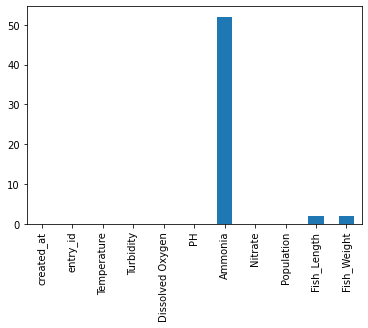

In [6]:
df_raw1.isna().sum().plot.bar()

In [7]:
df_raw1['Datetime'] = pd.to_datetime(df_raw1.created_at,infer_datetime_format=True)

/home/rupamay/anaconda3/lib/python3.8/site-packages/dateutil/parser/_parser.py:1213: UnknownTimezoneWarning: tzname CET identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


In [8]:
df_raw1.drop(columns='created_at', axis=1,inplace=True)

In [9]:
df_raw1.drop(columns='entry_id', axis=1,inplace=True)

In [10]:
df_raw1['Date'] = df_raw1['Datetime'].dt.date
df_raw1['Time'] = df_raw1['Datetime'].dt.time

In [11]:
df_raw1.head(5)

,Temperature,Turbidity,Dissolved Oxygen,PH,Ammonia,Nitrate,Population,Fish_Length,Fish_Weight,Datetime,Date,Time
0,24.8750,100,4.505,8.43365,0.45842,193,50,7.11,2.91,2021-06-19 00:00:05,2021-06-19,00:00:05
1,24.9375,100,6.601,8.43818,0.45842,194,50,7.11,2.91,2021-06-19 00:01:02,2021-06-19,00:01:02
2,24.8750,100,15.797,8.42457,0.45842,192,50,7.11,2.91,2021-06-19 00:01:22,2021-06-19,00:01:22
3,24.9375,100,5.046,8.43365,0.45842,193,50,7.11,2.91,2021-06-19 00:01:44,2021-06-19,00:01:44
4,24.9375,100,38.407,8.40641,0.45842,192,50,7.11,2.91,2021-06-19 00:02:07,2021-06-19,00:02:07


Sort DataFrame by Date (Datetime)

In [12]:
df=df_raw1.sort_values(by='Datetime') 

In [ ]:
# df_raw1 = df_raw1.dropna()
#clean up missing data here
# df.ffill(axis=0,inplace=True)

We have 83126 records. We have 2 records where fish weight is missing . And there are 52 records where Ammonia reading is missing. Start date- 19th of June ,'21 and end date- 13th of Oct,'21

In [265]:
d=df["Date"].unique()
print(len(d))
d

81


array([datetime.date(2021, 6, 19), datetime.date(2021, 6, 20),
       datetime.date(2021, 6, 21), datetime.date(2021, 6, 22),
       datetime.date(2021, 6, 23), datetime.date(2021, 6, 24),
       datetime.date(2021, 6, 25), datetime.date(2021, 6, 28),
       datetime.date(2021, 6, 29), datetime.date(2021, 6, 30),
       datetime.date(2021, 7, 1), datetime.date(2021, 7, 2),
       datetime.date(2021, 7, 10), datetime.date(2021, 7, 11),
       datetime.date(2021, 7, 12), datetime.date(2021, 7, 13),
       datetime.date(2021, 7, 14), datetime.date(2021, 7, 15),
       datetime.date(2021, 7, 16), datetime.date(2021, 7, 17),
       datetime.date(2021, 7, 18), datetime.date(2021, 7, 19),
       datetime.date(2021, 7, 20), datetime.date(2021, 7, 21),
       datetime.date(2021, 7, 22), datetime.date(2021, 7, 23),
       datetime.date(2021, 7, 24), datetime.date(2021, 7, 25),
       datetime.date(2021, 7, 26), datetime.date(2021, 7, 27),
       datetime.date(2021, 7, 28), datetime.date(2021, 7,

In [266]:
a=df["Fish_Weight"].unique()
print(len(a))
a

81


array([  2.91,   3.85,   4.79,   5.73,   6.67,   7.61,   8.55,  11.37,
        12.31,  13.25,  14.19,  15.13,  23.73,  24.82,  25.91,  26.97,
        28.03,  29.12,  30.21,  31.4 ,  33.73,  36.06,  38.39,  40.72,
        43.05,  43.38,  47.71,  50.04,  52.37,  54.7 ,  57.03,  59.36,
        61.69,  64.  ,  64.44,  64.88,  65.32,  65.76,  66.2 ,  66.64,
        67.08,  67.52,  67.96,  68.4 ,  68.84,  69.28,  69.72,  70.2 ,
        74.13,  78.05,  81.97,  85.89,  93.75,  97.65, 101.57, 104.49,
       121.17, 125.2 , 128.55, 131.9 , 135.25, 138.6 , 145.3 , 148.65,
       152.  , 198.42, 205.  , 211.58, 218.16, 224.74, 257.64, 264.2 ,
       267.39, 270.58, 273.77, 276.96, 280.15, 283.84, 313.72, 316.18,
       318.64])

In [267]:
start=a[0]
print(d[0])
for i in range(len(a)-1):
    print(i)
    print(d[i+1],'-----------',a[i+1]-start)
    start=a[i+1]

2021-06-19
0
2021-06-20 ----------- 0.94
1
2021-06-21 ----------- 0.94
2
2021-06-22 ----------- 0.9400000000000004
3
2021-06-23 ----------- 0.9399999999999995
4
2021-06-24 ----------- 0.9400000000000004
5
2021-06-25 ----------- 0.9400000000000004
6
2021-06-28 ----------- 2.8199999999999985
7
2021-06-29 ----------- 0.9400000000000013
8
2021-06-30 ----------- 0.9399999999999995
9
2021-07-01 ----------- 0.9399999999999995
10
2021-07-02 ----------- 0.9400000000000013
11
2021-07-10 ----------- 8.6
12
2021-07-11 ----------- 1.0899999999999999
13
2021-07-12 ----------- 1.0899999999999999
14
2021-07-13 ----------- 1.0599999999999987
15
2021-07-14 ----------- 1.0600000000000023
16
2021-07-15 ----------- 1.0899999999999999
17
2021-07-16 ----------- 1.0899999999999999
18
2021-07-17 ----------- 1.1899999999999977
19
2021-07-18 ----------- 2.3299999999999983
20
2021-07-19 ----------- 2.3300000000000054
21
2021-07-20 ----------- 2.3299999999999983
22
2021-07-21 ----------- 2.3299999999999983
23
2021

Lets find out records where Fish_Weight is missing

In [16]:
rec_where_fish_wt_are_na=df[df["Fish_Weight"].isna() ]

In [17]:
rec_where_fish_wt_are_na


,Temperature,Turbidity,Dissolved Oxygen,PH,Ammonia,Nitrate,Population,Fish_Length,Fish_Weight,Datetime,Date,Time
39256,24.6875,100,6.102,7.38957,17.98907,319,50,NaN,NaN,2021-07-25 00:00:50,2021-07-25,00:00:50
39257,24.6875,100,0.794,7.41227,14.90670,319,50,NaN,NaN,2021-07-25 00:02:09,2021-07-25,00:02:09


Both the missing data are from same date- 2021-07-25

In [18]:
rec_From_the_Date=df[df["Date"]== d[27]]
rec_From_the_Date

,Temperature,Turbidity,Dissolved Oxygen,PH,Ammonia,Nitrate,Population,Fish_Length,Fish_Weight,Datetime,Date,Time
39256,24.6875,100,6.102,7.38957,17.98907,319,50,NaN,NaN,2021-07-25 00:00:50,2021-07-25,00:00:50
39257,24.6875,100,0.794,7.41227,14.90670,319,50,NaN,NaN,2021-07-25 00:02:09,2021-07-25,00:02:09
39258,24.6875,100,2.628,7.38957,19.21741,312,50,17.57,50.04,2021-07-25 00:04:27,2021-07-25,00:04:27
39259,24.6875,100,6.668,7.38049,18.98034,315,50,17.57,50.04,2021-07-25 00:04:46,2021-07-25,00:04:46
39260,24.6875,100,2.155,7.38957,18.43942,308,50,17.57,50.04,2021-07-25 00:05:26,2021-07-25,00:05:26
...,...,...,...,...,...,...,...,...,...,...,...,...
40129,24.5000,100,2.307,7.38957,11.43541,368,50,17.57,50.04,2021-07-25 23:54:30,2021-07-25,23:54:30
40130,24.4375,100,7.395,7.38957,11.07750,373,50,17.57,50.04,2021-07-25 23:55:09,2021-07-25,23:55:09
40131,24.5000,100,8.815,7.38503,10.68908,368,50,17.57,50.04,2021-07-25 23:58:06,2021-07-25,23:58:06
40132,24.5000,100,0.490,7.38957,10.07359,357,50,17.57,50.04,2021-07-25 23:58:26,2021-07-25,23:58:26


Therefore, I am going to fill up the missing records with Fish-Length= 17.57 and fish weight =50.04 as every record from the same date have the same Fish-Length= 17.57 and fish weight =50.04.

In [19]:
df["Fish_Length"].fillna(17.57, inplace = True) 
df["Fish_Weight"].fillna(50.04, inplace = True) 

In [20]:
rec_From_the_Date=df[df["Date"]== d[27]]
rec_From_the_Date

,Temperature,Turbidity,Dissolved Oxygen,PH,Ammonia,Nitrate,Population,Fish_Length,Fish_Weight,Datetime,Date,Time
39256,24.6875,100,6.102,7.38957,17.98907,319,50,17.57,50.04,2021-07-25 00:00:50,2021-07-25,00:00:50
39257,24.6875,100,0.794,7.41227,14.90670,319,50,17.57,50.04,2021-07-25 00:02:09,2021-07-25,00:02:09
39258,24.6875,100,2.628,7.38957,19.21741,312,50,17.57,50.04,2021-07-25 00:04:27,2021-07-25,00:04:27
39259,24.6875,100,6.668,7.38049,18.98034,315,50,17.57,50.04,2021-07-25 00:04:46,2021-07-25,00:04:46
39260,24.6875,100,2.155,7.38957,18.43942,308,50,17.57,50.04,2021-07-25 00:05:26,2021-07-25,00:05:26
...,...,...,...,...,...,...,...,...,...,...,...,...
40129,24.5000,100,2.307,7.38957,11.43541,368,50,17.57,50.04,2021-07-25 23:54:30,2021-07-25,23:54:30
40130,24.4375,100,7.395,7.38957,11.07750,373,50,17.57,50.04,2021-07-25 23:55:09,2021-07-25,23:55:09
40131,24.5000,100,8.815,7.38503,10.68908,368,50,17.57,50.04,2021-07-25 23:58:06,2021-07-25,23:58:06
40132,24.5000,100,0.490,7.38957,10.07359,357,50,17.57,50.04,2021-07-25 23:58:26,2021-07-25,23:58:26


So we have fixed the missing fish-weight and fish-length records. Next lets go for ammonia

In [21]:
rec_where_ammonia_are_na=df[df["Ammonia"].isna() ]

In [22]:
rec_where_ammonia_are_na

,Temperature,Turbidity,Dissolved Oxygen,PH,Ammonia,Nitrate,Population,Fish_Length,Fish_Weight,Datetime,Date,Time
12388,25.0000,100,6.664,8.20667,NaN,178,50,9.06,7.61,2021-06-24 22:44:08,2021-06-24,22:44:08
14028,25.0000,100,11.397,7.96608,NaN,148,50,10.62,11.37,2021-06-28 20:15:21,2021-06-28,20:15:21
14047,25.0000,100,9.723,7.95700,NaN,134,50,10.62,11.37,2021-06-28 20:28:42,2021-06-28,20:28:42
17540,24.8750,100,7.336,7.89799,NaN,141,50,11.01,12.31,2021-06-29 20:04:40,2021-06-29,20:04:40
17560,24.8750,100,7.032,7.89799,NaN,135,50,11.01,12.31,2021-06-29 20:11:11,2021-06-29,20:11:11
17707,24.8125,100,6.913,7.90253,NaN,138,50,11.01,12.31,2021-06-29 21:03:01,2021-06-29,21:03:01
18933,24.0000,100,8.891,7.87983,NaN,129,50,11.40,13.25,2021-06-30 07:48:57,2021-06-30,07:48:57
19039,24.0000,100,13.684,7.87075,NaN,132,50,11.40,13.25,2021-06-30 08:56:23,2021-06-30,08:56:23
19166,24.1250,100,10.632,7.83444,NaN,134,50,11.40,13.25,2021-06-30 10:08:43,2021-06-30,10:08:43
19974,25.1875,100,2.040,7.83898,NaN,131,50,11.40,13.25,2021-06-30 18:34:38,2021-06-30,18:34:38


In [23]:
rec_From_the_Date=df[df["Date"]== d[5]]
rec_From_the_Date

,Temperature,Turbidity,Dissolved Oxygen,PH,Ammonia,Nitrate,Population,Fish_Length,Fish_Weight,Datetime,Date,Time
11098,24.1250,100,2.916,8.27476,0.45842,144,50,9.06,7.61,2021-06-24 00:00:15,2021-06-24,00:00:15
11099,24.1250,100,5.096,8.28384,0.45842,142,50,9.06,7.61,2021-06-24 00:00:35,2021-06-24,00:00:35
11100,24.1250,100,6.271,8.28838,0.45842,142,50,9.06,7.61,2021-06-24 00:00:55,2021-06-24,00:00:55
11101,24.1250,100,4.783,8.28384,0.45842,143,50,9.06,7.61,2021-06-24 00:03:24,2021-06-24,00:03:24
11102,24.1250,100,11.909,8.27476,0.45842,141,50,9.06,7.61,2021-06-24 00:03:44,2021-06-24,00:03:44
...,...,...,...,...,...,...,...,...,...,...,...,...
12458,24.9375,100,8.418,8.18851,0.45842,159,50,9.06,7.61,2021-06-24 23:55:25,2021-06-24,23:55:25
12459,24.8750,100,23.269,8.20213,0.45842,159,50,9.06,7.61,2021-06-24 23:56:24,2021-06-24,23:56:24
12460,24.9375,100,10.387,8.19759,0.45842,158,50,9.06,7.61,2021-06-24 23:58:17,2021-06-24,23:58:17
12461,24.9375,100,8.655,8.19305,0.45842,155,50,9.06,7.61,2021-06-24 23:58:56,2021-06-24,23:58:56


In [24]:
# use datetime_is_numeric = True to get statistics on the datetime column
desc = rec_From_the_Date.describe(datetime_is_numeric = True)
desc

,Temperature,Turbidity,Dissolved Oxygen,PH,Ammonia,Nitrate,Population,Fish_Length,Fish_Weight,Datetime
count,1365.000000,1365.0,1365.000000,1365.000000,1.364000e+03,1365.000000,1365.0,1.365000e+03,1.365000e+03,1365
mean,24.432692,100.0,13.440205,8.226844,9.929543e+07,146.868132,50.0,9.060000e+00,7.610000e+00,2021-06-24 12:17:14.700366336
min,23.625000,100.0,0.104000,8.179440,4.584200e-01,128.000000,50.0,9.060000e+00,7.610000e+00,2021-06-24 00:00:15
25%,23.875000,100.0,5.734000,8.202130,4.584200e-01,139.000000,50.0,9.060000e+00,7.610000e+00,2021-06-24 06:34:02
50%,24.437500,100.0,11.093000,8.211210,4.584200e-01,143.000000,50.0,9.060000e+00,7.610000e+00,2021-06-24 12:36:05
75%,25.000000,100.0,16.507000,8.261150,4.584200e-01,149.000000,50.0,9.060000e+00,7.610000e+00,2021-06-24 17:59:42
max,25.125000,100.0,40.993000,8.302000,9.113002e+10,201.000000,50.0,9.060000e+00,7.610000e+00,2021-06-24 23:59:53
std,0.549314,0.0,10.213574,0.031913,2.515824e+09,13.370818,0.0,5.508724e-14,9.773543e-15,NaN


In [25]:
df[12380:12391]

,Temperature,Turbidity,Dissolved Oxygen,PH,Ammonia,Nitrate,Population,Fish_Length,Fish_Weight,Datetime,Date,Time
12380,25.0000,100,9.691,8.19759,4.584200e-01,175,50,9.06,7.61,2021-06-24 22:37:46,2021-06-24,22:37:46
12381,25.0000,100,7.537,8.22483,9.051959e+09,178,50,9.06,7.61,2021-06-24 22:38:06,2021-06-24,22:38:06
12382,25.0000,100,8.017,8.19759,4.584200e-01,179,50,9.06,7.61,2021-06-24 22:39:40,2021-06-24,22:39:40
12383,24.9375,100,18.104,8.19759,4.584200e-01,177,50,9.06,7.61,2021-06-24 22:40:00,2021-06-24,22:40:00
12384,24.9375,100,7.167,8.20213,1.301838e+10,175,50,9.06,7.61,2021-06-24 22:41:33,2021-06-24,22:41:33
12385,25.0000,100,6.880,8.20213,1.382595e+09,178,50,9.06,7.61,2021-06-24 22:42:30,2021-06-24,22:42:30
12386,25.0000,100,4.982,8.20213,2.167664e+09,179,50,9.06,7.61,2021-06-24 22:42:50,2021-06-24,22:42:50
12387,24.9375,100,29.904,8.20213,4.584200e-01,179,50,9.06,7.61,2021-06-24 22:43:49,2021-06-24,22:43:49
12388,25.0000,100,6.664,8.20667,NaN,178,50,9.06,7.61,2021-06-24 22:44:08,2021-06-24,22:44:08
12389,25.0000,100,6.728,8.19759,4.584200e-01,176,50,9.06,7.61,2021-06-24 22:45:04,2021-06-24,22:45:04


I am going to drop all the records where Ammonia is missing

In [26]:
i = df[(df.Ammonia.isna())].index
df.drop(i,inplace=True)

In [27]:
df.describe()

,Temperature,Turbidity,Dissolved Oxygen,PH,Ammonia,Nitrate,Population,Fish_Length,Fish_Weight
count,83074.000000,83074.000000,83074.000000,83074.000000,8.307400e+04,83074.000000,83074.0,83074.000000,83074.000000
mean,24.573337,87.482329,12.392993,7.518177,2.030817e+08,458.496918,50.0,16.417091,44.585049
std,0.861746,25.865572,12.520454,0.534904,7.866231e+09,338.322088,0.0,5.272785,33.218335
min,-127.000000,1.000000,0.007000,-0.586270,6.770000e-03,45.000000,50.0,7.110000,2.910000
25%,24.125000,91.000000,3.440000,7.153520,4.584200e-01,146.000000,50.0,11.790000,14.190000
50%,24.562500,100.000000,7.133000,7.357790,6.116600e-01,347.000000,50.0,18.080000,54.700000
75%,24.937500,100.000000,15.834750,7.838980,1.558803e+01,823.000000,50.0,21.000000,67.520000
max,27.750000,100.000000,41.046000,8.551670,4.270000e+11,1936.000000,50.0,33.450000,318.640000


In [29]:
df.to_csv('Pond1.csv')

We do not have reading for an equal interval in a particular day . Also , we have missing dates where there was no reading taken between start date and end date.

In [358]:
df= pd.read_csv("Pond1.csv", delimiter = ",",low_memory=False )

In [359]:
df.drop(['Unnamed: 0'], axis=1,inplace=True)

In [360]:
df.head(5)

,Datetime,Temperature,Turbidity,Dissolved Oxygen,PH,Ammonia,Nitrate,Population,Fish_Length,Fish_Weight,Date,Time
0,2021-06-19 00:00:05,24.8750,100,4.505,8.43365,0.45842,193,50,7.11,2.91,2021-06-19,00:00:05
1,2021-06-19 00:01:02,24.9375,100,6.601,8.43818,0.45842,194,50,7.11,2.91,2021-06-19,00:01:02
2,2021-06-19 00:01:22,24.8750,100,15.797,8.42457,0.45842,192,50,7.11,2.91,2021-06-19,00:01:22
3,2021-06-19 00:01:44,24.9375,100,5.046,8.43365,0.45842,193,50,7.11,2.91,2021-06-19,00:01:44
4,2021-06-19 00:02:07,24.9375,100,38.407,8.40641,0.45842,192,50,7.11,2.91,2021-06-19,00:02:07


In [361]:

df['Datetime'] = pd.to_datetime(df.Datetime,infer_datetime_format=True)
df['Date'] = df['Datetime'].dt.date
df['Time'] = df['Datetime'].dt.time
df['Date_diff'] = df['Date'].diff()
# df['diff'] = df['diff'].fillna(0)



In [362]:
df.head(5)

,Datetime,Temperature,Turbidity,Dissolved Oxygen,PH,Ammonia,Nitrate,Population,Fish_Length,Fish_Weight,Date,Time,Date_diff
0,2021-06-19 00:00:05,24.8750,100,4.505,8.43365,0.45842,193,50,7.11,2.91,2021-06-19,00:00:05,NaT
1,2021-06-19 00:01:02,24.9375,100,6.601,8.43818,0.45842,194,50,7.11,2.91,2021-06-19,00:01:02,0 days
2,2021-06-19 00:01:22,24.8750,100,15.797,8.42457,0.45842,192,50,7.11,2.91,2021-06-19,00:01:22,0 days
3,2021-06-19 00:01:44,24.9375,100,5.046,8.43365,0.45842,193,50,7.11,2.91,2021-06-19,00:01:44,0 days
4,2021-06-19 00:02:07,24.9375,100,38.407,8.40641,0.45842,192,50,7.11,2.91,2021-06-19,00:02:07,0 days


In [363]:
df['Date_diff']=df['Date_diff'].astype('timedelta64[D]')

In [364]:
df['Date_diff'] = df['Date_diff'].fillna(0)

In [365]:
df.head(5)

,Datetime,Temperature,Turbidity,Dissolved Oxygen,PH,Ammonia,Nitrate,Population,Fish_Length,Fish_Weight,Date,Time,Date_diff
0,2021-06-19 00:00:05,24.8750,100,4.505,8.43365,0.45842,193,50,7.11,2.91,2021-06-19,00:00:05,0.0
1,2021-06-19 00:01:02,24.9375,100,6.601,8.43818,0.45842,194,50,7.11,2.91,2021-06-19,00:01:02,0.0
2,2021-06-19 00:01:22,24.8750,100,15.797,8.42457,0.45842,192,50,7.11,2.91,2021-06-19,00:01:22,0.0
3,2021-06-19 00:01:44,24.9375,100,5.046,8.43365,0.45842,193,50,7.11,2.91,2021-06-19,00:01:44,0.0
4,2021-06-19 00:02:07,24.9375,100,38.407,8.40641,0.45842,192,50,7.11,2.91,2021-06-19,00:02:07,0.0


In [366]:
df['Date_diff'].unique()

array([ 0.,  1.,  3.,  8.,  2.,  4., 10.,  5.])

In [367]:
p=df[df['Date_diff']>=2]
p       

,Datetime,Temperature,Turbidity,Dissolved Oxygen,PH,Ammonia,Nitrate,Population,Fish_Length,Fish_Weight,Date,Time,Date_diff
13340,2021-06-28 12:44:33,25.0000,100,18.198,7.91615,4.584200e-01,122,50,10.62,11.37,2021-06-28,12:44:33,3.0
27545,2021-07-10 14:49:25,24.8125,100,7.708,7.56207,1.281596e+07,121,50,14.16,23.73,2021-07-10,14:49:25,8.0
81155,2021-08-20 14:54:40,24.1875,100,2.138,7.00371,1.142240e+00,829,50,23.18,93.75,2021-08-20,14:54:40,2.0
81350,2021-08-27 12:12:09,24.8750,100,0.819,6.93562,8.075100e-01,771,50,23.95,121.17,2021-08-27,12:12:09,4.0
82262,2021-09-03 14:46:33,24.2500,100,0.819,6.86753,5.116340e+00,1152,50,25.60,145.30,2021-09-03,14:46:33,2.0
82648,2021-09-15 14:01:43,25.0625,100,1.065,4.47977,1.529050e+00,864,50,28.80,198.42,2021-09-15,14:01:43,10.0
82820,2021-09-24 05:55:28,25.0000,100,0.624,-0.22765,6.515560e+00,1009,50,31.23,257.64,2021-09-24,05:55:28,5.0
82860,2021-10-11 14:02:20,27.7500,100,1.389,6.06858,3.951263e+01,953,50,33.31,313.72,2021-10-11,14:02:20,10.0


In [368]:
start=a[0]
print(d[0])
for i in range(len(a)-1):
    print(i)
    print(d[i+1],'-----------',a[i+1]-start)
    start=a[i+1]

2021-06-19
0
2021-06-20 ----------- 0.94
1
2021-06-21 ----------- 0.94
2
2021-06-22 ----------- 0.9400000000000004
3
2021-06-23 ----------- 0.9399999999999995
4
2021-06-24 ----------- 0.9400000000000004
5
2021-06-25 ----------- 0.9400000000000004
6
2021-06-28 ----------- 2.8199999999999985
7
2021-06-29 ----------- 0.9400000000000013
8
2021-06-30 ----------- 0.9399999999999995
9
2021-07-01 ----------- 0.9399999999999995
10
2021-07-02 ----------- 0.9400000000000013
11
2021-07-10 ----------- 8.6
12
2021-07-11 ----------- 1.0899999999999999
13
2021-07-12 ----------- 1.0899999999999999
14
2021-07-13 ----------- 1.0599999999999987
15
2021-07-14 ----------- 1.0600000000000023
16
2021-07-15 ----------- 1.0899999999999999
17
2021-07-16 ----------- 1.0899999999999999
18
2021-07-17 ----------- 1.1899999999999977
19
2021-07-18 ----------- 2.3299999999999983
20
2021-07-19 ----------- 2.3300000000000054
21
2021-07-20 ----------- 2.3299999999999983
22
2021-07-21 ----------- 2.3299999999999983
23
2021

In [369]:
df['Weight_diff'] = df['Fish_Weight'].diff()
df['Weight_diff'] = df['Weight_diff'].fillna(0)

In [370]:
df['Weight_diff'].unique()

array([ 0.  ,  0.94,  0.94,  0.94,  2.82,  0.94,  8.6 ,  1.09,  1.06,
        1.06,  1.19,  2.33,  2.33,  0.33,  4.33,  2.31,  0.44,  0.44,
        0.48,  3.93,  3.92,  7.86,  3.9 ,  3.92,  2.92, 16.68,  4.03,
        3.35,  3.35,  6.7 , 46.42,  6.58,  6.58, 32.9 ,  6.56,  3.19,
        3.69, 29.88,  2.46])

In [371]:
rec_From_the_Date=df[df["Date"]== d[7]]
rec_From_the_Date

,Datetime,Temperature,Turbidity,Dissolved Oxygen,PH,Ammonia,Nitrate,Population,Fish_Length,Fish_Weight,Date,Time,Date_diff,Weight_diff
13340,2021-06-28 12:44:33,25.0000,100,18.198,7.91615,0.45842,122,50,10.62,11.37,2021-06-28,12:44:33,3.0,2.82
13341,2021-06-28 12:44:52,25.0000,100,20.592,7.92523,0.45842,119,50,10.62,11.37,2021-06-28,12:44:52,0.0,0.00
13342,2021-06-28 12:45:12,25.0625,100,19.223,7.92069,0.45842,115,50,10.62,11.37,2021-06-28,12:45:12,0.0,0.00
13343,2021-06-28 12:45:33,25.0625,100,21.201,7.92523,0.45842,115,50,10.62,11.37,2021-06-28,12:45:33,0.0,0.00
13344,2021-06-28 12:45:52,25.0625,100,24.213,7.92069,0.45842,115,50,10.62,11.37,2021-06-28,12:45:52,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14286,2021-06-28 23:56:49,24.7500,100,7.125,7.93884,0.45842,118,50,10.62,11.37,2021-06-28,23:56:49,0.0,0.00
14287,2021-06-28 23:58:23,24.8125,100,8.764,7.93884,0.45842,118,50,10.62,11.37,2021-06-28,23:58:23,0.0,0.00
14288,2021-06-28 23:59:19,24.8125,100,6.339,7.93884,0.45842,121,50,10.62,11.37,2021-06-28,23:59:19,0.0,0.00
14289,2021-06-28 23:59:39,24.7500,100,7.023,7.94338,0.45842,120,50,10.62,11.37,2021-06-28,23:59:39,0.0,0.00


In [372]:
date_group=df.groupby("Date", sort = False)

In [373]:
date_group.first()

,Datetime,Temperature,Turbidity,Dissolved Oxygen,PH,Ammonia,Nitrate,Population,Fish_Length,Fish_Weight,Time,Date_diff,Weight_diff
Date,,,,,,,,,,,,,
2021-06-19,2021-06-19 00:00:05,24.8750,100,4.505,8.43365,0.45842,193,50,7.11,2.91,00:00:05,0.0,0.00
2021-06-20,2021-06-20 00:00:30,25.9375,100,9.259,8.38371,0.45842,193,50,7.50,3.85,00:00:30,1.0,0.94
2021-06-21,2021-06-21 00:00:17,25.8750,100,36.428,8.39733,0.45842,176,50,7.89,4.79,00:00:17,1.0,0.94
2021-06-22,2021-06-22 14:00:41,24.7500,100,11.402,8.34740,0.45842,172,50,8.28,5.73,14:00:41,1.0,0.94
2021-06-23,2021-06-23 00:00:06,24.9375,100,6.930,8.32016,0.45842,150,50,8.67,6.67,00:00:06,1.0,0.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-30,2021-09-30 01:21:21,25.0625,100,0.096,-0.20949,10.90991,1338,50,32.05,280.15,01:21:21,1.0,3.19
2021-10-01,2021-10-01 01:56:59,25.2500,100,0.200,-0.15956,7.79854,1204,50,32.17,283.84,01:56:59,1.0,3.69
2021-10-11,2021-10-11 14:02:20,27.7500,100,1.389,6.06858,39.51263,953,50,33.31,313.72,14:02:20,10.0,29.88


Shifting the weight difference to the previous day recording since the weight recorded for the current day reflects previous day's water quality.

In [374]:
for i in range(len(date_group)-1):
    df.iloc[df.loc[df["Date"]==d[i]].index[0],13]=date_group.get_group(d[i+1]).Weight_diff.max()
    print(df[df["Date"]==d[i]].iloc[0,13])
    
    

0.94
0.94
0.9400000000000004
0.9399999999999995
0.9400000000000004
0.9400000000000004
2.8199999999999985
0.9400000000000013
0.9399999999999995
0.9399999999999995
0.9400000000000013
8.6
1.0899999999999999
1.0899999999999999
1.0599999999999987
1.0600000000000023
1.0899999999999999
1.0899999999999999
1.1899999999999977
2.3299999999999983
2.3300000000000054
2.3299999999999983
2.3299999999999983
2.3299999999999983
0.3300000000000054
4.329999999999998
2.3299999999999983
2.3299999999999983
2.3300000000000054
2.3299999999999983
2.3299999999999983
2.3299999999999983
2.3100000000000023
0.4399999999999977
0.4399999999999977
0.4399999999999977
0.44000000000001194
0.4399999999999977
0.4399999999999977
0.4399999999999977
0.4399999999999977
0.4399999999999977
0.44000000000001194
0.4399999999999977
0.4399999999999977
0.4399999999999977
0.480000000000004
3.9299999999999926
3.9200000000000017
3.9200000000000017
3.9200000000000017
7.859999999999999
3.9000000000000057
3.9199999999999875
2.9200000000000017

In [375]:
date_group.first()

,Datetime,Temperature,Turbidity,Dissolved Oxygen,PH,Ammonia,Nitrate,Population,Fish_Length,Fish_Weight,Time,Date_diff,Weight_diff
Date,,,,,,,,,,,,,
2021-06-19,2021-06-19 00:00:05,24.8750,100,4.505,8.43365,0.45842,193,50,7.11,2.91,00:00:05,0.0,0.94
2021-06-20,2021-06-20 00:00:30,25.9375,100,9.259,8.38371,0.45842,193,50,7.50,3.85,00:00:30,1.0,0.94
2021-06-21,2021-06-21 00:00:17,25.8750,100,36.428,8.39733,0.45842,176,50,7.89,4.79,00:00:17,1.0,0.94
2021-06-22,2021-06-22 14:00:41,24.7500,100,11.402,8.34740,0.45842,172,50,8.28,5.73,14:00:41,1.0,0.94
2021-06-23,2021-06-23 00:00:06,24.9375,100,6.930,8.32016,0.45842,150,50,8.67,6.67,00:00:06,1.0,0.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-30,2021-09-30 01:21:21,25.0625,100,0.096,-0.20949,10.90991,1338,50,32.05,280.15,01:21:21,1.0,3.69
2021-10-01,2021-10-01 01:56:59,25.2500,100,0.200,-0.15956,7.79854,1204,50,32.17,283.84,01:56:59,1.0,29.88
2021-10-11,2021-10-11 14:02:20,27.7500,100,1.389,6.06858,39.51263,953,50,33.31,313.72,14:02:20,10.0,2.46


In [376]:
dates_to_be_dropped=[]
for i in range(len(date_group)-1):
    df.iloc[df.loc[df["Date"]==d[i]].index[0],12]=date_group.get_group(d[i+1]).Date_diff.max()
    print(d[i],'------' ,df[df["Date"]==d[i]].iloc[0,12])
    if (df[df["Date"]==d[i]].iloc[0,12])>=2:
        dates_to_be_dropped.append(d[i]) 

2021-06-19 ------ 1.0
2021-06-20 ------ 1.0
2021-06-21 ------ 1.0
2021-06-22 ------ 1.0
2021-06-23 ------ 1.0
2021-06-24 ------ 1.0
2021-06-25 ------ 3.0
2021-06-28 ------ 1.0
2021-06-29 ------ 1.0
2021-06-30 ------ 1.0
2021-07-01 ------ 1.0
2021-07-02 ------ 8.0
2021-07-10 ------ 1.0
2021-07-11 ------ 1.0
2021-07-12 ------ 1.0
2021-07-13 ------ 1.0
2021-07-14 ------ 1.0
2021-07-15 ------ 1.0
2021-07-16 ------ 1.0
2021-07-17 ------ 1.0
2021-07-18 ------ 1.0
2021-07-19 ------ 1.0
2021-07-20 ------ 1.0
2021-07-21 ------ 1.0
2021-07-22 ------ 1.0
2021-07-23 ------ 1.0
2021-07-24 ------ 1.0
2021-07-25 ------ 1.0
2021-07-26 ------ 1.0
2021-07-27 ------ 1.0
2021-07-28 ------ 1.0
2021-07-29 ------ 1.0
2021-07-30 ------ 1.0
2021-07-31 ------ 1.0
2021-08-01 ------ 1.0
2021-08-02 ------ 1.0
2021-08-03 ------ 1.0
2021-08-04 ------ 1.0
2021-08-05 ------ 1.0
2021-08-06 ------ 1.0
2021-08-07 ------ 1.0
2021-08-08 ------ 1.0
2021-08-09 ------ 1.0
2021-08-10 ------ 1.0
2021-08-11 ------ 1.0
2021-08-12

In [377]:
dates_to_be_dropped.append(d[len(date_group)-1])  
dates_to_be_dropped

[datetime.date(2021, 6, 25),
 datetime.date(2021, 7, 2),
 datetime.date(2021, 8, 18),
 datetime.date(2021, 8, 23),
 datetime.date(2021, 9, 1),
 datetime.date(2021, 9, 5),
 datetime.date(2021, 9, 19),
 datetime.date(2021, 10, 1),
 datetime.date(2021, 10, 13)]

In [378]:
# df.iloc[df.loc[df["Date_diff"]>=2.index[0],12]
# #         print(df.iloc[df.loc[df["Date"]==d[i]].index[0],12])
# #         print(d[i])
# # print(i)
i=0
for i in range(len(dates_to_be_dropped)):
    m=df.loc[df["Date"]==dates_to_be_dropped[i]].index
    df.drop(m,inplace=True)
    df.reset_index()

In [380]:
df.tail(5)

,Datetime,Temperature,Turbidity,Dissolved Oxygen,PH,Ammonia,Nitrate,Population,Fish_Length,Fish_Weight,Date,Time,Date_diff,Weight_diff
83050,2021-10-12 22:54:49,26.8750,100,0.868,2.29175,3.27350,1168,50,33.38,316.18,2021-10-12,22:54:49,0.0,0.0
83051,2021-10-12 23:13:36,26.8750,100,2.086,2.45063,2.89575,1159,50,33.38,316.18,2021-10-12,23:13:36,0.0,0.0
83052,2021-10-12 23:39:12,26.8125,100,0.616,2.54596,3.20135,1197,50,33.38,316.18,2021-10-12,23:39:12,0.0,0.0
83053,2021-10-12 23:44:06,26.8750,100,2.170,2.37346,4.83556,1148,50,33.38,316.18,2021-10-12,23:44:06,0.0,0.0
83054,2021-10-12 23:53:10,26.8125,100,1.682,2.34622,4.38998,1173,50,33.38,316.18,2021-10-12,23:53:10,0.0,0.0


In [381]:
d[6]

datetime.date(2021, 6, 25)

In [382]:
rec_From_the_Date=df[df["Date"]== d[6]]
rec_From_the_Date

,Datetime,Temperature,Turbidity,Dissolved Oxygen,PH,Ammonia,Nitrate,Population,Fish_Length,Fish_Weight,Date,Time,Date_diff,Weight_diff


In [383]:
d[11]

datetime.date(2021, 7, 2)

In [384]:
rec_From_the_Date=df[df["Date"]== d[11]]
rec_From_the_Date

,Datetime,Temperature,Turbidity,Dissolved Oxygen,PH,Ammonia,Nitrate,Population,Fish_Length,Fish_Weight,Date,Time,Date_diff,Weight_diff


In [386]:
df.drop("Date_diff",axis=1,inplace=True)


In [387]:
df.to_csv('cleaned_Pond1.csv')